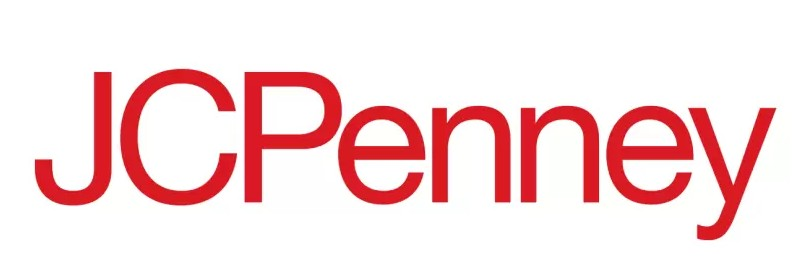
*(Image from: https://logowik.com/jcpenney-logo-vector-41646.html, 10/11/2025)*

# Insights Overview

JCPenney has grown since its beginning in 1902 into one of America's largest home and clothing retailers (Castro and George, 2021). In 2021, they had over 850 stores across USA states, and they launched 'jcpenney.com' in 2020, placing them amongst the first retailers to embrace the rise in e-commerce (Castro & George, 2021). 

Studies have shown the COVID19 pandemic induced a persisitent upward shift in the percentage of the population using of online retail (Szasz *et al*, 2022), with Szasz *et al's* analysis in 2022 indicating that even if some customers return to traditional shopping channels, a large segment of customers will shift their long-term orientation towards online channels.
Using the data sets provided, this report aims to explore how JCPenney can utilise customer written product reviews, customer product scores, and customer age and location data to increase online sales and improve online customer retention, ultimately increasing JCPenneys market share in the ecommerce retail sector.

This report has assumed that all customers in the data set are online users with an individual online account.

**<u> Proportion users per state in America</u>**

An overview of the density of online users per state will highlight states with lower uptake of JCPenney's e-commerce operations. This will be valuable in directing advertising to increase awareness in the states which suggest there is scope for increasing their online customer base. Utilising the 'users.csv' data set and the 'plotly.graph_objects' library, a density map is produced to display online user density per state in America. The map is intepreted using the colour scale lengend on the right hand side.

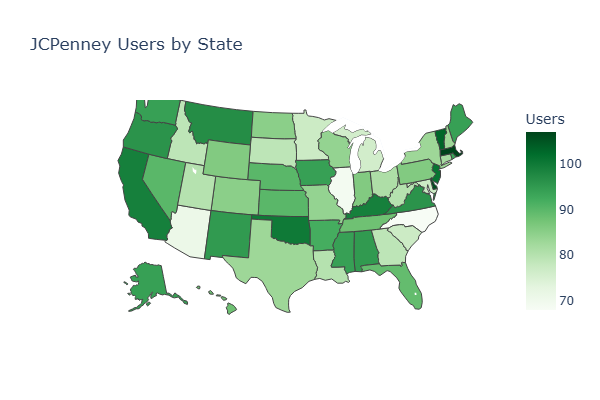

*Fig.I: map generated using code in appendix, insight 1, Figure I.*

The map shows JCPenney has varied online user uptake across the USA, with highest density of users in California, Montana, Oklahoma and Massachusetts. And lowest density in Arizona, Illinois and North Carolina.
This data will be valuable to identify the reasons for decreased users in some states, and use this information to guide increasing market share for online retail in these states.
Next steps in utilising this information include:
* collect data showing the number of physical stores per state and map this to the online user distribution. If there is a positive correlation, the online user distribution highlighted by this map could be due to awareness of the company, and so JCPenney could focus on increasing their brand awareness in the states with lower density of online users.
* collect data showing delivery times and cost across different states - this may highlight a correlation between inefficiency or increased cost associated with the online ordering process which is reducing uptake of online customers in these lower density states.

**<u>Relationship between age category and online user density</u>**

A deeper look into the number of users in different age categories will shed light on any underrepresented age demographics in JCPenney's online retail business. 
Online users from the 'users.csv' data set were grouped into the following age categories: 'Young Adult: 16-29', 'Adult: 30-59', 'Senior: 60-80'. These age groups are chosen based on presumed stereotypical life stages: Young Adult - education and early career, Adult - Career and family, Senior - late career and retirement. The bar plot (*Fig.II*), generated using 'plotly', shows number of online users by age category, displayed in ascending order, to allow visual comparison of volume.

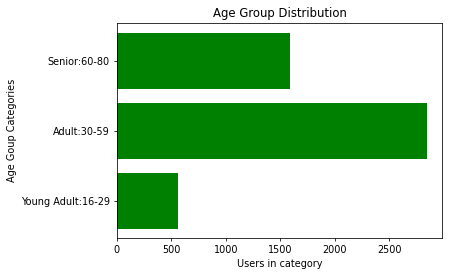    

*Fig.II: barplot generated using code in appendix, Insight 2, fig II*

Analysis of number of users per age category shows the majority of JCPenney's online customers fall into the 'Adult' age category, with much lower numbers in the 'Senior' and 'Young Adult' categories. It would be important to first check the data collection process to ensure that this is a random representative sample, and that there has been no bias towards age based data collection. It would also be important to confirm the minimum age required to create an online account with JCPenney, with the youngest user being born in 2001 (24 years old).
If we assume the data is a true representation of JCPenney's online customer age demographic, customers who fall into the 'Young Adult' and 'Senior' categories suggest opportunities for untapped sales revenue. 
Drilling down into users that fall into the 'Senior' category, within the data provided, you can explore relationships between age and website category most visited/purchased from, to see if, based on age on signing up to an account, advertising can be targeted on an individual account basis to showcase these more popular categories and help Senior users navigate to these areas of the website. With the data provided, a sentiment analysis could be conducted on the written reviews to highlight positive and negative experiences from users in the Senior category. Action can then be taken using these insights to improve the Senior user experience, and create targeted advertising for the Senior customers based on these criteria.

Before drilling into the lack of 'Young Adult' online customers under 24, it would be important to have confirmation of the parameters of the data collected - for example was data filtered by a minumum age or is there a minumum age bracket when potential customers create an online account. This informaiton would influence further data analysis undertaken for this age category.

To further drill down into the distribution density of user ages within each age category, a box plot has been generated (*Figure III*) from the user.csv data set and the seaborn library.

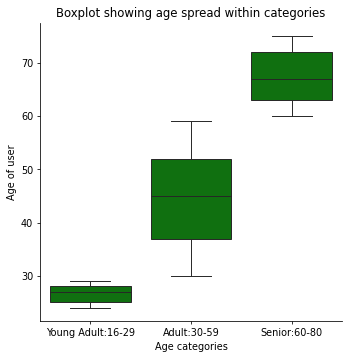

*Fig.III: boxplot generated using code in appendix, Insight 2, figure III*

There is a box plot per age category, showing the median age of users in each category and the distribution in the quartiles above and below this  median age. 

The 'Young Adult' box plot displays a negative skew with the median user age being towards the top of the box. Based on the already acknowledged limitations to the user.csv data set with regards this age category, I would not be confident in stating this as a significant analysis result. The 'Adult' box plot displays a box with likely normal distribution with the median age user being central. This would suggest that user uptake in this category is evenly distributed across the age range. The 'Senior' age category is positively skewed with the median age being closer to the bottom of the box. This would suggest there is a higher density of users at the lower end of the 'Senior' age range.

Using the insights from the box plot analysis, the data from the 'Adult' and 'Senior' users could be further drilled into to quantify account activity, looking at account purchases and reviews over time, to assess customer retention. Time series data modelling could be utilised here. If patterns are identified, this information can be used to generate targeted advertising and customer retention campaigns.

**<u>Benchmarking with the highest performing brands<u>**

JCPenny can utilise the wealth of data provided by customer reviews to continually assess, improve and streamline their online retail operations and customer experience. Using the 'jcpenney_products.JSON' data set, a DataFrame was generated based on the filters: product average numerical rating 5/5 and those products with 8 reviews. Average product score 5/5 was selected as this is understood to be the highest numerical score a product can recieve indicating high levels of customer satisfaction. Products with a set number of reviews were selected to allow quantification of review numbers, 'number of reviews = 8' was chosen as this was filter that returned the largest sample with over minumum of total 5 reviews. These highest performing products were then matched to their brand in the category tree, giving a data set with the highest performing brands according to average product numerical score. The brands were then filtered for those which contained over five products that were rated 5/5, to give the final DataFrame. A bar plot was generated using plotly to visualise these top brands.

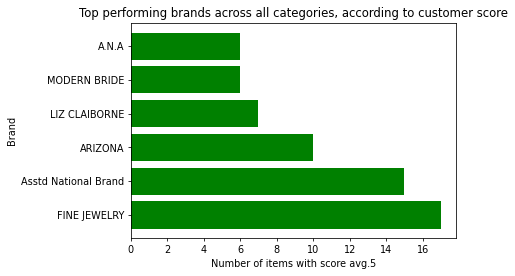

*Fig.IV: Bar plot generated using code in Appendix, Insight 3, fig IV*

This analysis is displayed in the above bar plot, to give a visual comparison of the best performing brands according to average customer numerical score. 'Fine Jewelry' is the highest rated brand according to this analysis, with over 16 products recieving an average product rating of 5/5.

We can drill down into the written reviews associated with these products to identify their key performance indicators that online customers value, and extrapolate these indicators as a benchmark to improve underperforming areas within the organisation. Examples of key performance indicators that could be used in JCPenney's internal benchmarking process could be related to: customer service experience, product quality, image and description accuracy, size guide accuracy, delivery and returns service. Once identified, these outcomes can be implemented across the company to standardise their operations. 

This dataset could be improved before being utilised for this analsyis. It is relying on customer reviews articulating and explaining their experience. However, JCPenney could generate more valuable data by streamlining their review process - for example if this initial analysis identifies key areas that provide a positive customer experience, they can change the review question format to generate more data on these areas. For example 2-3 questions that review or rate customer service, product quality and delivery.

**<u>Do the written reviews shed any light on the lowest scoring products that can be actioned on?<u>**

Written reviews for lowest scoring products can be a valuable resource to highlight issues resulting in a negative customer experience, which we can hypothesis will lead to reduce retention of these customers. 
Using the 'jcpenney_products.JSON' Products were filtered for those with an average product rating less than 2/5, and with 8 reviews per product (chosen to allow quantifiable number of reviews for analysis). The resulting dataframe was then searched for a list of words associated with negative reviews or experiences, with the goal of assessing which experiences these words were associated with - for example, customer service, expectations of product not met, poor quality, poor delivery etc. These insights could then be used to review and improve these areas.
However, on conducting the above analysis, very few negative word matches were identified, leading me to the suspicion that there was a mismatch between the numerical score and the content of the users written review. Further analysis, by filtering the reviews for a list of positive words of similar style to the 'negative word list', returned over half (280) of the reviews in the DataFrame containing one or more of the words in the list. It would be expected that a low numerical score would correlate with a negative written review, this is not the case in this DataFrame. To highlight this disparity, a pie chart showing the difference between negative and positive word reviews has been generated using plotly.

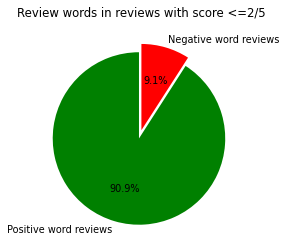

*Fig.V: Pie chart generated from appendix, insight 4, figure V*

The above pie chart displays the large mismatch between negative and positive words filtered from product reviews that have an average product rating lower than 2/5. It is important to note that it has been assumed 1/5 is a low score and 5/5 is a high score.

The analysis was then pivoted to highlight this discrepency between numerical score and written review. Although not the initial goal of this analysis, it has highlighted a problem within the review system on the JCPenney online retail business. In online retail, customer reviews provide a valuable resource to monitor the companies success and predict future customer retentiona and ultimately sales. By not utilising the review system, JCPenney are losing valuable data which can help them to continue to develope and improving their service, increasing revenue.

Steps that can be taken to address this include but are not limited to:
* confirm that the numerical score reflects 1/5 being a low score and 5/5 a high score.
* Analyse the dataframe to assess whether, where a customer leaves a positive written review, there is a corresponding <2/5 numerical score. Or is it the case that low numerical scores to not have a corresponding written review - i.e. there is little effort by the customer leaving the numerical only review, therefore this data holds less value.
* Drill into JCPenney's review process: is it clear the ranking of numerical score when customers are being asked to rate their experience? To make the most of analysis such a valuable data source, it is important that the information collected is accurate.

Although this method effectively filters for reviews containing negative or positive words from a pre-determined list, it does not show if there are reviews returning for both lists - i.e. it is possible there are reviews containing matches for both positve and negative words. This method provides very good topline analysis to get an overview of negative or positive word trends within the dataframe. Utilising natural language processing techniques through a sentiment analysis would allow for better classification of each review as 'positive', 'negative', or 'neutral'.

<u>**Negative Pricing**<u>

During the data cleaning and preparation process, it was discovered that in both the 'products.csv' and 'jcpenney_products.JSON' data sets, the brand 'Xersion' contained 29 products with a negative 'list price'. For the purpose of the analysis, these products were removed from the data as presumed data entry errors or anomalies. 
A discussion with JCPenney could shed light on the actual reason for these negative list prices, whether they are true data anomalies or they reflect, for example, a refund.

# <u>Appendix</u>

Business question identified: how can customers written reviews, review scores, age and location data be used to increase online sales and customer retention for JCPenney?

The source of data has been provided as five separate data sets - three 'csv' files and two 'JSON' files. This report will utilise these data sources and suggest further modifications or additional data sources that may be useful. The data will be loaded, cleaned and prepared as necessary. Data analysis will be used to create 4 insights that will look at different ways the data can be utilised to answer the identified question. I will use the data visualisations generated to discuss these results in the 'Insights Overview' section at the start of this report.
This appendix provides the process carried out using python. The process includes data cleaning, data preparation and data analysis and generation of data visualisations.

**Data Overview**
5 files were provided, the scope of the data contained information on customers (DOB, state location, username), and customer reviews (unique ID & SKU, item purchased, list & sale price, category & brand, numerical score, written review, items bought with).
After cleaning and preparing all 5 data sets, as requried for my analysis objectives, I used the data sets: users.csv and JCPenney_products.JSON. I did not use the remaining 3 data sets because the information contained was not relevant to my analysis objectives and, to preserve space, the data cleaning and preparation of these 3 sets has been removed from the final report.

In [2]:
# Libraries used:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import json
%matplotlib inline
import plotly.graph_objects as go 
import seaborn as sns
from tabulate import tabulate

# Data preparation and cleaning:

**Products.csv data set in format 'csv'**
This dataset contains the unique ID (of purchase), item SKU, item name, item description, price, average score.
The data set has been loaded. Data cleaning and preparation has been conducted but this has been removed from the final report to preserve space. The information within this data set was not required for the data analysis objectives.

In [3]:
# First look at data Frame contents.
products_csv = pd.read_csv('products.csv')
print("Rows, columns:", products_csv.shape)
products_csv.head(2) # modified to show first 2 rows & all columns in DataFrame, confirms loaded.

Rows, columns: (7982, 6)


,Uniq_id,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000


**Reviews.csv data Frame in the 'csv' format**
This dataset contains the unique id, username, numerical score and written review.
The data set has been loaded. Data cleaning and preparation has been conducted but this has been removed from the final report to preserve space. The information within this data set was not required for the data analysis objectives.

In [4]:
# First look at data Frame, shows first 5 rows and all columns. '.shape' gives count of columns and rows.
reviews_csv = pd.read_csv('reviews.csv')
print("Rows, columns:", reviews_csv.shape) 
reviews_csv.head(2)

Rows, columns: (39063, 4)


,Uniq_id,Username,Score,Review
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...


**Users_csv data set in the 'csv' format**
This data set contains customer name, their date of birth, and the state they are registered in. The code below lays out the data preparation and cleaning process required for the data analysis objectives.

In [5]:
# Get first look at data set
users_csv = pd.read_csv('users.csv')
print("Rows, columns:", users_csv.shape)
users_csv.head(2)

Rows, columns: (5000, 3)


,Username,DOB,State
0,bkpn1412,31.07.1983,Oregon
1,gqjs4414,27.07.1998,Massachusetts


In [6]:
print("Datatypes:", "\n", users_csv.dtypes, "\n") 
# Displays data types - DOB needs changed to DateTime format.
print("Missing data:", "\n", users_csv.isna().sum()) # checks for missing data.

Datatypes: 
 Username    object
DOB         object
State       object
dtype: object 

Missing data: 
 Username    0
DOB         0
State       0
dtype: int64


In [7]:
users_csv['DOB'] = pd.to_datetime(users_csv['DOB'], dayfirst=True)
print(users_csv.dtypes) # Converted DOB column to datetime format, British date format.

Username            object
DOB         datetime64[ns]
State               object
dtype: object


In [8]:
users_csv['DOB_Year'] = users_csv['DOB'].dt.year
display(users_csv.head(2)) # Extract year of birth into DOB_Year column for analysis.

,Username,DOB,State,DOB_Year
0,bkpn1412,1983-07-31,Oregon,1983
1,gqjs4414,1998-07-27,Massachusetts,1998


Shows duplication of one username in two entries, but the rest of the information suggests different person. These entries will be removed Removed these entries as. Only 2 entries and this could confuse data looking at customer distribution in states.

In [9]:
duplicate = users_csv['Username'].duplicated(keep=False)
print(users_csv[duplicate]) # Used 'duplicated()' to filter out duplicated.

      Username        DOB       State  DOB_Year
731   dqft3311 1995-07-28   Tennessee      1995
2619  dqft3311 1969-08-03  New Mexico      1969


In [10]:
users_csv.drop(731, inplace=True) # Remove data rows with duplicate username, removed by index.

In [11]:
users_csv.drop(2619, inplace=True)

Add column showing abbreviations for states, abbreviations for choropleth USA from (https://pe.usps.com/text/pub28/28apb.htm, on 07.11.2025).

In [12]:
# New variable as dictionary with state as key and new state abbreviation as value.
State_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL',
    'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'American Samoa': 'AS', 'Guam': 'GU', 'Northern Mariana Islands': 'MP', 'Puerto Rico': 'PR', 'Virgin Islands': 'VI'
}

In [13]:
users_csv['State_abbr'] = users_csv['State'].map(State_abbr)
display(users_csv.head(2)) 
# Maps 'state abbreviations' column to the original 'State' column. Needed for choropleth map.

,Username,DOB,State,DOB_Year,State_abbr
0,bkpn1412,1983-07-31,Oregon,1983,OR
1,gqjs4414,1998-07-27,Massachusetts,1998,MA


In [14]:
# Create new variable containing copy of 'users_csv' for use in analysis.
users_csvready = users_csv.copy() 

**jcpenney_products.json Data Frame**
This  data set is a JSON file. It contains information on: product IDs and SKUs; product name, list price, sale price, category, category tree, average rating, url, image urls, brand, total review, written reviews, items bought with. The code below lays out the data preparation and cleaning process required for the data analysis objectives.

In [3]:
# First look at data Frame, shows first 5 rows and all columns. 
jcpenney_prods = pd.read_json('jcpenney_products.json', lines=True)
print("Rows, columns:", jcpenney_prods.shape)
jcpenney_prods.head(2)

Rows, columns: (7982, 15)


,uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews,Bought With
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567..."
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,3.000,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'tpcu2211', 'Review': 'You never hav...","[bc9ab3406dcaa84a123b9da862e6367d, 18eb69e8fc2..."


In [4]:
# Remove columns that I do not need for analysis objectives by redefining the variable.
jcpenney_prods = jcpenney_prods[['uniq_id', 'sku', 'name_title', 'list_price', 'category', 'average_product_rating', 
                                 'product_url', 'product_image_urls', 'brand', 'total_number_reviews', 'Reviews']]

In [5]:
jcpenney_prods.dtypes # Shows data types present in updated columns. 
# List_price will need changed to 'float'.

uniq_id                    object
sku                        object
name_title                 object
list_price                 object
category                   object
average_product_rating    float64
product_url                object
product_image_urls         object
brand                      object
total_number_reviews        int64
Reviews                    object
dtype: object

In [6]:
# Use Numpy to replace empty strings with NaN.
jcpenney_prods['list_price'] = jcpenney_prods['list_price'].replace('', np.nan) 
# Change datatype of 'list_price for numerical analysis.
jcpenney_prods['list_price'] = jcpenney_prods['list_price'].astype(float) 

In [7]:
print("Datatypes:", "\n", jcpenney_prods.dtypes, "\n") # Displays data types present.
# Check for missing values. 
print("Missing data:", "\n", jcpenney_prods.isna().sum()) 

Datatypes: 
 uniq_id                    object
sku                        object
name_title                 object
list_price                float64
category                   object
average_product_rating    float64
product_url                object
product_image_urls         object
brand                      object
total_number_reviews        int64
Reviews                    object
dtype: object 

Missing data: 
 uniq_id                      0
sku                          0
name_title                   0
list_price                2166
category                     0
average_product_rating       0
product_url                  0
product_image_urls           0
brand                        0
total_number_reviews         0
Reviews                      0
dtype: int64


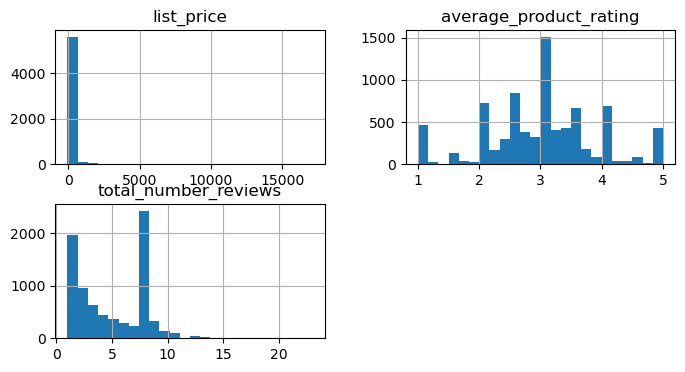

In [20]:
jcpenney_prods.hist(figsize=(8,4), bins=24) 
plt.show() # Displays numerical values to visualise data 

The extension of the x-axis in the 'total_number_reviews' histograph suggests data points present above 15 but in a very small volume - need to assess if these are true values or anomalies/outliers.
The extension of the x-axis in the 'list_price' histograph suggests list_prices present above '2500' but very small volume.
The 'average_product_rating' histograph shows the distribution of ratings, note ratings can be fraction.

In [21]:
# Filters for rows with >15 reviews, used to confirm that these are genuine products and not data anomalies.
print("Rows, columns:", jcpenney_prods[jcpenney_prods['total_number_reviews']>15].shape)
jcpenney_prods[jcpenney_prods['total_number_reviews']>15].head(2)

Rows, columns: (22, 11)


,uniq_id,sku,name_title,list_price,category,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews
273,cac156c12e4a23304d4c1912cf7eb37f,pp5005840398,St. John's Bay® Secretly Slender Straight-Leg ...,NaN,view all,2.900000,http://www.jcpenney.com/st-johns-bay-secretly-...,http://s7d2.scene7.com/is/image/JCPenney/DP070...,St. John's Bay,20,"[{'User': 'zsje4241', 'Review': 'disappointed...."
580,b0ebb2af70787285699ec500f2d69312,pp5003162937,Dirt Devil® Vigor Cyclonic Pet Bagless Upright...,181.29,laundry & cleaning,2.529412,http://www.jcpenney.com/dirt-devil-vigor-cyclo...,http://s7d9.scene7.com/is/image/JCPenney/DP081...,Dirt Devil,17,"[{'User': 'zuwp1111', 'Review': 'Switching to ..."


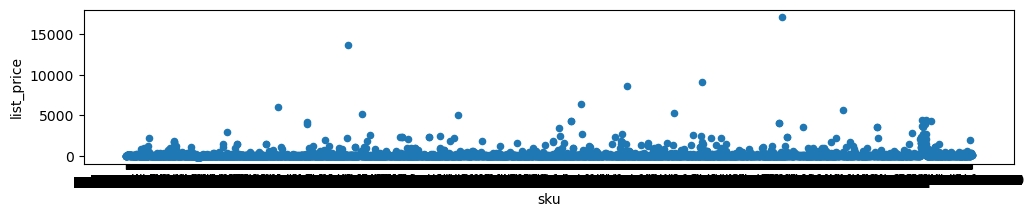

In [22]:
# scatter plot showing distribution of SKU list prices
jcpenney_prods.plot(kind='scatter', y='list_price', x='sku', figsize=(12,2))
plt.show()

Scattergraph to show the overview distribution of list price. There are few outliers above '2500' and indication of negative price points.

Rows, columns: (44, 11)


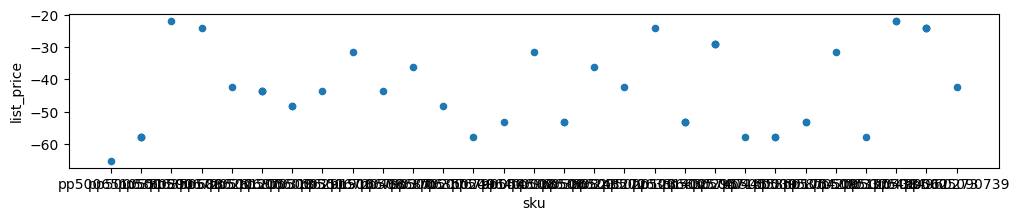

In [23]:
# Filters for negative prices, displays in scatter graph and uses '.shape' to confirm number.
print("Rows, columns:", jcpenney_prods[jcpenney_prods['list_price']<0].shape)
jcpenney_prods[jcpenney_prods['list_price']<0].plot(kind='scatter', y='list_price', x='sku', figsize=(12,2))
plt.show()

All negative 'list price' items are of brand 'Xersion. Would require discussion with the client to establish pricing stategies to check whether these are true data entries or data anomalies. There are 44 rows, representing 29 individual products, I will remove this from the dataset for the analysis, such a small volume should not affect analysis outcomes.

In [9]:
# creates array of item names that have 'list price' below 0
negative_listprice = jcpenney_prods[jcpenney_prods['list_price']<0]['name_title'].unique()
print("Rows, columns:", negative_listprice.shape)
display(negative_listprice)

Rows, columns: (29,)


array(['Xersion™ Go Swiftly Vest - Plus',
       'Xersion™ Graphic Leggings - Tall',
       'Xersion™ Graphic Tank Top - Girls 7-16 and Plus',
       'Xersion™ Graphic Tank Top',
       'Xersion™ Jagger Girls Athletic Shoes - Little Kids/Big Kids',
       'Xersion™ Lincoln Quick-Dri Capris - Tall',
       'Xersion™ Long-Sleeve High-Low Sweatshirt - Tall',
       'Xersion™ Mesh Athletic Capris - Plus',
       'Xersion™ Mesh Back Tank Top',
       'Xersion™ Mesh Capri Leggings - Plus', 'Xersion™ Mesh Mix Skort',
       'Xersion™ Nylon Packable Jacket', 'Xersion™ Ombre Capris - Plus',
       'Xersion™ Performance Capri Pants with Tummy Control - Plus',
       'Xersion™ Performance Capris - Girls 7-16 and Plus',
       'Xersion™ Performance Capris - Tall',
       'Xersion™ Performance Pants - Girls 7-16',
       'Xersion™ Piped Tricot Pants', 'Xersion™ Power Tee',
       'Xersion™ Print Compression Capris',
       'Xersion™ Printed 3/4-Length Compression Slider Shorts',
       'Xersion™ Pr

A new variable is created with all price points<0 and unwanted data columns removed, the correct data types are present.
A copy is made to use for the analysis.

In [25]:
jcpenney_prodsclean = jcpenney_prods[jcpenney_prods['list_price']>=0]
print("Rows, columns:", jcpenney_prodsclean.shape)

Rows, columns: (5772, 11)


In [26]:
# Create new variable containing copy of 'jcpenney_prodsclean' for use in analysis.
jcpenney_prodsready = jcpenney_prodsclean.copy()

**Jcpenney_reviewers.json data set in format 'JSON'**
This dataset contains the username, date of birth and state of online users, and the unique ID of the items they reviewed.
The data set has been loaded. Data cleaning and preparation has been conducted but this has been removed from the final report to preserve space. The information within this data set was not required for the data analysis objectives.

In [27]:
# First look at data Frame, shows first 5 rows and all columns. 
jcpenney_rev = pd.read_json('jcpenney_reviewers.json', lines=True)
print("Rows, columns:", jcpenney_rev.shape)
jcpenney_rev.head(2) # .head() has been reduced to '2' to save space for the report.

Rows, columns: (5000, 4)


,Username,DOB,State,Reviewed
0,bkpn1412,31.07.1983,Oregon,[cea76118f6a9110a893de2b7654319c0]
1,gqjs4414,27.07.1998,Massachusetts,[fa04fe6c0dd5189f54fe600838da43d3]


# The Analysis:

Insight 1: Is there a difference in online users per state?

Insight 2: Is there a relationship between age category and density of online users?

Insight 3: How can JCPenney utilise this data to support an internal benchmarking process?

Insight 4: How can JCPenney utilise this data to improve customer satisfaction?

Insight 5: Xersion brand products and negative list prices.


**Is there a difference in online users per state?**

Goal: to show the density distribution of users per state in the USA. To highlight states with lower user density which could show a gap in the market to target.

In [28]:
# New variable created which contains a new column holding the counts of number of users per state.
users_per_state = users_csvready.groupby('State_abbr')['Username'].count().reset_index(name='User Count')
display(users_per_state.head())

,State_abbr,User Count
0,AK,94
1,AL,95
2,AR,92
3,AS,86
4,AZ,71


In [29]:
# A choropleth map, created using 'plotly.graph_objects'. The output has been collapsed (#) to facilitate export to PDF
# Note will not be interactive in PDF. Exported image to file then added to 'report' section.
fig_USA = go.Figure(
    data=go.Choropleth(locations=users_per_state['State_abbr'],
    z=users_per_state['User Count'].astype(float), locationmode = 'USA-states', colorscale = 'Greens', colorbar_title = 'Users'))
#fig_USA.update_layout(title_text = 'JCPenney Users by State', geo_scope='usa', width=600, height=400)#

<u>*Fig.I:* A map of USA states colour coded to show density distribution of online users in DataFrame</u>

**Insight 2: Is there a relationship between age category and density of online users?**

Goal: to view the distribution of users by age to see if there are under-represented age categories.

In [30]:
Users = users_csvready.groupby('DOB_Year')['Username'].count().reset_index(name='Users_per_year')
display(Users.head(2)) # groups and counts number of users registered for each DOB year.
print("Range of user years:", Users['DOB_Year'].min(), Users['DOB_Year'].max()) # displays min-max range of user age year.

,DOB_Year,Users_per_year
0,1950,99
1,1951,95


Range of user years: 1950 2001


There are multiple ways to split user categories. I choose these numbers based on assumed lifestyle stages: Young adult - education & early career; Adult - career/family; Senior - late career/retired.

In [31]:
# Group into year age categories to make bins for plot.
dob_years = users_csvready['DOB_Year'] # assign the data from DOB_Year column to new variable.
Age_categories = pd.DataFrame({'DOB': dob_years}) # create dataframe 'age_categories', with key:value pairs.
current_year = 2025
Age_categories['Age'] = current_year - Age_categories['DOB'] # column in dataframe to contain 'age' of user.

bins = [16,30,60,80] # creates age range boundries for 3 bins.
labels = ['Young Adult: 16-29', 'Adult: 30-59', 'Senior: 60-80'] # corresponding labels for bins.
# pd.cut function to sort users, by age, into age group catregories.
Age_categories['AgeGroup'] = pd.cut(Age_categories['Age'], bins=bins, labels=labels, right=False)
# right=False instructs bins to include the left edge of age range for bins - stops double counting of values.
print(Age_categories.head(2))

    DOB  Age            AgeGroup
0  1983   42        Adult: 30-59
1  1998   27  Young Adult: 16-29


In [32]:
# variable created to quatify number of users per category, will be needed for creating graph.
hist1 = Age_categories.groupby('AgeGroup', observed=False)['Age'].count().reset_index(name='Users_per_cat')
display(hist1.head(3)) 

,AgeGroup,Users_per_cat
0,Young Adult: 16-29,563
1,Adult: 30-59,2842
2,Senior: 60-80,1593


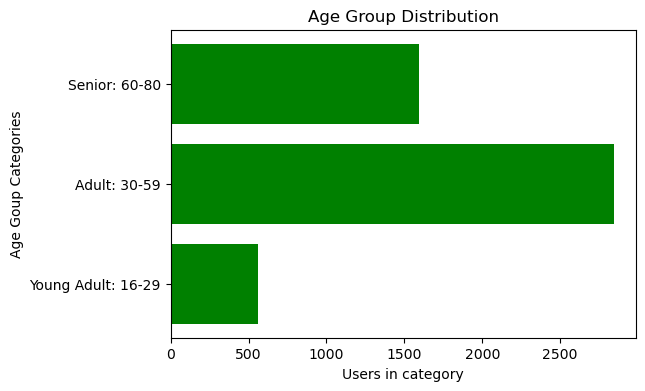

In [33]:
# using 'matplotlib.pyplot' to create bar plot showing number users in each age group category.
plt.figure(figsize=(6,4))
plt.barh(hist1['AgeGroup'],hist1['Users_per_cat'], color='Green')
plt.ylabel('Age Goup Categories')
plt.xlabel('Users in category')
plt.title('Age Group Distribution')
plt.savefig('Age_group_distribution.png', dpi=70, bbox_inches='tight') #plot saved to device
plt.show()

<u>*Fig. II:* Age Group Distribution box plot<u>

<Figure size 600x400 with 0 Axes>

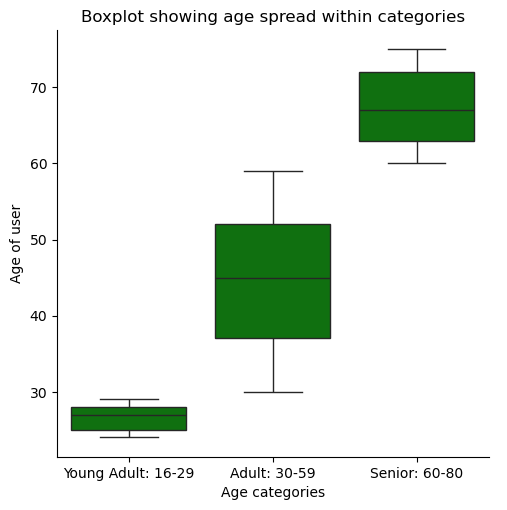

In [34]:
# boxplot created using the seaborn library
plt.figure(figsize=(6,4))
sns.catplot(x='AgeGroup', y='Age', kind='box', color='Green', data=Age_categories)
plt.ylabel('Age of user')
plt.xlabel('Age categories')
plt.title('Boxplot showing age spread within categories')
plt.savefig('Age_spread_box_plot', dpi=70, bbox_inches='tight') # plot saved to device.
plt.show()

<u>*Fig. III:* Box plot showing age distribution in age categries.</u>

**Insight 3: How can JCPenney utilise this data to support an internal benchmarking process.**

Goal: to filter for the highest rated products and their associated brands to utilise as internal benchmarks.

In [35]:
# extracting data columns that are needed from jcpenney_prodsready.
extracted_databrand = jcpenney_prodsready[['name_title', 'average_product_rating', 'brand']]
display(extracted_databrand.head(2))

,name_title,average_product_rating,brand
0,Alfred Dunner® Essential Pull On Capri Pant,2.625,Alfred Dunner
1,Alfred Dunner® Essential Pull On Capri Pant,3.000,Alfred Dunner


In [36]:
# group data by name title and brand to the mean of average product rating. Creating index to include 'Average score'.
average_score_per_namebrand = extracted_databrand.groupby(['name_title', 'brand'])['average_product_rating'].mean().reset_index()
average_score_per_namebrand.rename(columns={'average_product_rating': 'Overall_Av_Score'}, inplace=True)
print("Rows, columns:", average_score_per_namebrand.shape)
display(average_score_per_namebrand.head(2))

Rows, columns: (4304, 3)


,name_title,brand,Overall_Av_Score
0,1 CT. Certified Diamond Solitaire Ring,MODERN BRIDE,2.666667
1,1 CT. T.W. Certified Diamond 14K White Gold Br...,MODERN BRIDE,4.000000


In [37]:
# These are the top Named products with overall average score 5/5
av_scorebrand5 = average_score_per_namebrand[average_score_per_namebrand['Overall_Av_Score']==5]
print("Rows, columns:", av_scorebrand5.shape)
print(av_scorebrand5.head(2))

Rows, columns: (239, 3)
                                          name_title         brand  \
2  1 CT. T.W. Certified Diamond 14K White Gold Pr...  MODERN BRIDE   
8             1 CT. T.W. Diamond Ring 10K White Gold  MODERN BRIDE   

   Overall_Av_Score  
2               5.0  
8               5.0  


In [38]:
# this shows the brands that carry products with a 5/5 rating. 
inn = av_scorebrand5['brand'].value_counts().reset_index(name='value')
display(inn.head(2))

,brand,value
0,FINE JEWELRY,17
1,Asstd National Brand,15


In [39]:
# this filters for the brands which carry more than 5 different items with a 5/5 rating.
final = inn[inn['value']>5]
print("Row, column:", final.shape)
display(final.head(2))

Row, column: (6, 2)


,brand,value
0,FINE JEWELRY,17
1,Asstd National Brand,15


In [42]:
# filter for items of these top 5 brands to create new variable.
top_5_brands = av_scorebrand5[av_scorebrand5['brand'].isin(['FINE JEWELRY', 'Asstd National Brand', 'ARIZONA', 'LIZ CLAIBORNE','A.N.A',
                                                            'MODERN BRIDE'])]
print(top_5_brands.shape)
display(top_5_brands.head(2))

(61, 3)


,name_title,brand,Overall_Av_Score
2,1 CT. T.W. Certified Diamond 14K White Gold Pr...,MODERN BRIDE,5.0
8,1 CT. T.W. Diamond Ring 10K White Gold,MODERN BRIDE,5.0


In [43]:
# produce quantity data needed for bar plot.
barplot = top_5_brands['brand'].value_counts().reset_index(name='num_items')
display(barplot.head(2))

,brand,num_items
0,FINE JEWELRY,17
1,Asstd National Brand,15


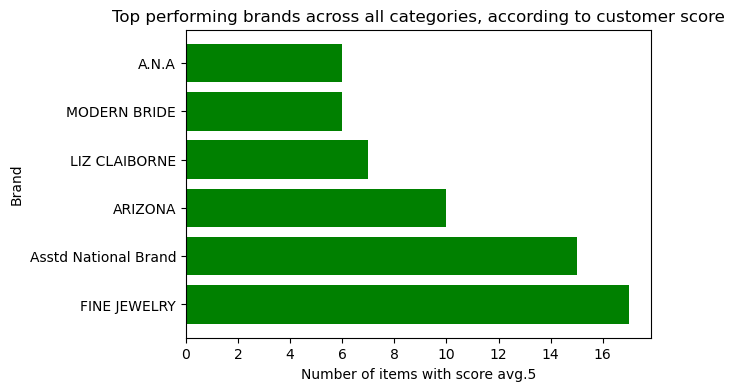

In [44]:
# bar plot created using the matplotlib pyplot library
#showing the brands carry more than 5 items scoring average 5/5 on customer score. - IE top perfoming brands across all 
# categories according to customer numerical score.
# 'savefig' is used to save the barplot to my device, I then use it in the report.
plt.figure(figsize=(6,4))
plt.barh(barplot['brand'],barplot['num_items'], color='Green')
plt.ylabel('Brand')
plt.xlabel('Number of items with score avg.5')
plt.title('Top performing brands across all categories, according to customer score')
plt.savefig('Top performing brands', dpi=70, bbox_inches='tight') #plot saved to device
plt.show()

<u>*Fig. IV:* Bar plot showing the top performing brands across all categories, according to numerical score<u>

**Insight 4: How can JCPenney utilise this data to improve customer satisfaction.**

Goal: to assess whether the written reviews shed any light on the lowest scoring products that can be actioned on.

Filter for items with average product rating equal or less than 2/5, and products with 8 reviews total. These values were choosen to provide a sample of lowest rated products with a set number of reviews to allow the quantitiy of reviews to be know. Number of reviews = 8 was choosen as this was the highest number of item reviews on the data set that would give a largest sample.

In [45]:
# create dataframe called 'rev_2' to contain new filtered products.
rev_2 = jcpenney_prodsready[(jcpenney_prodsready['average_product_rating']<=2) & (jcpenney_prodsready['total_number_reviews']==8)]
print("Row, column:", rev_2.shape)
display(rev_2.head(2))

Row, column: (53, 11)


,uniq_id,sku,name_title,list_price,category,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews
174,0a6cdfcd89839f922e73897eca27cff6,pp5003780369,adidas® 3G Speed Shorts-Big & Tall,33.11,shorts,2.0,http://www.jcpenney.com/adidas-3g-speed-shorts...,http://s7d2.scene7.com/is/image/JCPenney/DP021...,ADIDAS,8,"[{'User': 'efyc1434', 'Review': 'I am glad the..."
643,7e6b55fdb0b7c835c56211dd9f5a52d2,pp5003960429,Glamorise® Soft Shoulder Minimizer Bra - 9835,59.12,sale,2.0,http://www.jcpenney.com/glamorise-soft-shoulde...,http://s7d2.scene7.com/is/image/JCPenney/DP042...,Glamorise,8,"[{'User': 'rjzw1332', 'Review': 'Great fit esp..."


The negative words were choosen based on being common negative words in the British language, choosen by myself. This is a subjective method based on my personal opinion and could be better refined by using a resource that provides common negative review words in the American language.

In [46]:
# filter rev_2 for negative words.
negative_words = ['bad', 'unhappy', 'poor', 'terrible' 'cheap', 'bad value' 'not correct', 'wrong', 'disappointed',
                  'dislike', 'disliked', 'too small', 'too big', 'hated', 'hate', 'hates' 'upset', 'bad quality',
                  'uncomfortable', 'below expectations', 'do not recommend' ]
# create empty list to store filtered reviews
negative_reviews = []
#iterate through each product in the DataFrame
for uniq_id, product_data in rev_2.iterrows(): 
# I used '.iterrows' here because it is a relatively small dataset and I wanted to access row by row.
    reviews = product_data.get('Reviews')
    if reviews:
        for review_entry in reviews:
            review_text = review_entry.get('Review', '').lower() #'.lower()' function converts all strings to lowercase.
            user = review_entry.get('User', 'Unknown User')
            if any(word in review_text for word in negative_words):
                negative_reviews.append({ # add to list with following key:value format.
                    'uniq_id' : uniq_id,
                    'User' : user,
                    'Review' : review_text,
                    'Matched_Negative_Words' : [word for word in negative_words if word in review_text]
                })
negative_reviews_df = pd.DataFrame(negative_reviews) #create dataframe of negative review information.
print(f"Found {len(negative_reviews_df)} reviews containing negative words.")
display(negative_reviews_df.head(2))


Found 28 reviews containing negative words.


,uniq_id,User,Review,Matched_Negative_Words
0,1389,fumm1113,"these pants, (in petite cuz in only 51) are pe...",[bad]
1,1389,abof3221,disappointed that these were exactly the same ...,[disappointed]


My initial interpretation of this result is that, in this data, a low numerical score does not correlate with a negatively worded review. Therefore I pivoted this insight objective to explore the relationship between the product numerical score and words in the written review. The same reviews were filtered for a list of positive words, using the same method as to choose the negative words.

In [47]:
# filter rev_2 for positive words.
positive_words = ['good','unhappy', 'good value', 'perfect', 'right', 'perfect fit' 'delighted', 'loved',
                  'superior', 'comfortable', 'love', 'loves', 'really like', 'highly recommend',
                  'great quality', 'exceed expectations' ]
# create empty list to store filtered positive reviews
positive_reviews = []
for uniq_id, product_data in rev_2.iterrows():
    reviews = product_data.get('Reviews')
    if reviews:
        for review_entry in reviews:
            review_text = review_entry.get('Review', '').lower()
            user = review_entry.get('User', 'Unknown User')
            if any(word in review_text for word in positive_words):
                positive_reviews.append({
                    'uniq_id' : uniq_id,
                    'User' : user,
                    'Review' : review_text,
                    'Matched_Positive_Words' : [word for word in positive_words if word in review_text]
                })
positive_reviews_df = pd.DataFrame(positive_reviews)
print(f"Found {len(positive_reviews_df)} reviews containing positive words.")
display(positive_reviews_df.head(2))



Found 280 reviews containing positive words.


,uniq_id,User,Review,Matched_Positive_Words
0,174,efyc1434,i am glad these shorts were available in big a...,"[comfortable, love, loves]"
1,174,owpi4221,great fit and length for comfortable wear and ...,[comfortable]


The high number of products returned with a low numerical score and positive words supports my hypothesis that the written reviews do no reflect the numerical score. A pie chart has been created to visualise this analysis.

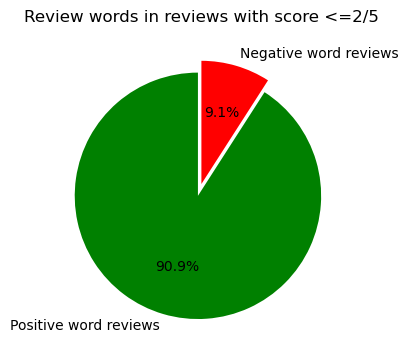

In [48]:
# pie chart created using plotly.
labels = ['Positive word reviews', 'Negative word reviews']
sizes = [280, 28]
colors = ['green', 'red']
explode = (0.1, 0)
plt.figure(figsize=(6,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=90)
plt.title('Review words in reviews with score <=2/5')
plt.savefig('Review words', dpi=70, bbox_inches='tight') # plot saved to device.
plt.show()


<u>*Fig. V:* Pie chart showing comparison total reviews with positive and negative words in low scoring reveiws<u>

*References:*
1. Castro, E. & George, J., 2021, JC PENNEY Versus The Retail Apocalypse: A Financial Statement Analysis Case, Journal of Finance Case Research, Vol.19(2), pp.37-38. Available at: https://jfedweb.org/JFCRdir/JFCR19N2.pdf#page=45 (Accessed: 12.11.2025)
2. The pandemic as a window of opportunity - ScienceDirect: Szasz, L. *et al*, 2022, The impact of COVID-19 on the evolution of online retail: The pandemic as a window of opportunity, Journal of Retailing and Consumer Services, Vol.69(103089), doi:https://doi.org/10.1016/j.jretconser.2022.103089